# Bestimmen der Fallbeschleunigung des Planeten X:


**Versuchsbeschreibung:**
Stellen Sie sich den folgenden Versuch vor: Jahr 2132, die Firma SpaceYpsilon hat Sie auf eine Außenmission auf den Planeten ?? geschickt. Hier sollen Sie zusammen mit ihrem Versuchspartner/in die Fallbeschleunigung g?? des Planeten bestimmen. Als Versuch lassen sie eine Kugel aus unterschiedlichen Fallhöhen innerhalb einer evakuierten Glasröhre fallen. Sie lassen die Kugel insgesamt aus 10 unterschiedlichen
Höhen Fallen.

Basierend auf der Versuchsbeschreibung wissen wir, dass es sich bei dem Versuch um einen Freien Fall handelt, welcher als eine gleichförmig beschleunigte Bewegung beschrieben werden kann. D.h. es liegt der folgende Zusammenhang zwischen den gemessenen Höhen und Fallzeiten vor:

$$h(t, g) = 1/2 \cdot g \cdot t^2$$ 

### Aufgabenstellung:

Bestimmen Sie mit Hilfe ihrer Vorbereitungsaufgabe 1 und der entsprechenden Funktion die
Fallbeschleunigung g?? mittels eines Chi²-Fits. Diskutieren Sie anschließend mittels der Güte
Ihres Fits ob ihre Fitfunktion die gemessenen Daten gut widerspiegelt. Auf welchen Planeten
in unserem Sonnensystem befinden Sie sich?
Testen Sie anschließend ob nicht ein linearere Fit besser geeignet wäre. Begründen Sie Ihre
Antwort.

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
height = [1, 1.2, 1.4, 1.6, 2, 2.2, 2.4, 2.6, 2.8] # in m
dheight = [0.01]*len(height) # in m
time = [0.74, 0.8, 0.87, 0.94, 1.03, 1.1, 1.15, 1.17, 1.24] # in s
dtime = [12, 11, 9, 8, 11, 12, 13, 80, 10] # in ms

# Zeitfehler in s umrechnen:
dtime = [i/1000 for i in dtime]

def fallhoehe(t, g):
    return 0.5 * g * t**2

Anschließend können wir uns die Daten erstmal angucken:

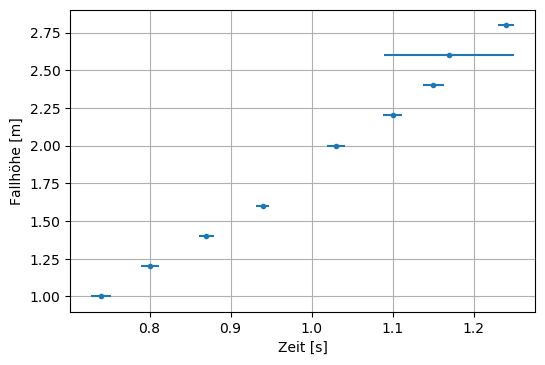

In [3]:
# Plotten der Messdaten:
plt.figure(dpi=100)
plt.errorbar(time, 
             height, 
             xerr=dtime, 
             yerr=dheight, 
             ls='', 
             marker='.')
plt.xlabel('Zeit [s]')
plt.ylabel('Fallhöhe [m]')
plt.grid()
plt.show()

Die Messdaten sehen bereits leicht parabelförmig aus. Als nächstes wollen wir unser Model `fallhoehe` an unsere Daten fitten:

In [43]:
para, pcov = curve_fit(fallhoehe, 
                       time,
                       height,
                       sigma=dheight,
                       absolute_sigma=True
                      )

Der Fit hat funktioniert gucken wir uns also doch mal die Fitgüte und den Wert für g an:

In [44]:
chi = sum([(fallhoehe(t, para[0]) - h)**2/dh**2 for t, h, dh in zip(time, height, dheight)])

print(f'''
Das die Fitgüte Chi²/ndof lautet {chi:.2f}/{len(height)-1}
und der Wert für g ist {para[0]:.2f} +/- {pcov[0,0]:.2f} m/s
''')


Das die Fitgüte Chi²/ndof lautet 127.31/8
und der Wert für g ist 3.69 +/- 0.00 m/s



Wie ihr seht ist unser $\chi^2$/ndof (wobei ndof die Anzahl an Freiheitsgrade sind) nicht schlecht. Darüber hinaus scheint der Fehler des Wertes kleiner zu sein als die Anazahl an signifikanten Stellen die uns zur Verfügung stehen.  

Als zweites sollen wir das ganze nochmal wiederholen um zu testen ob ein lineare Fit nicht besser an die Daten passt.

In [32]:
def fallhoehe2(t, v, h0):
    return t * v + h0

para2, pcov2 = curve_fit(fallhoehe2, 
                       time,
                       height,
                       sigma=dheight,
                       absolute_sigma=True
                      )

chi = sum([(fallhoehe2(t, para2[0], para2[1]) - h)**2/dh**2 for t, h, dh in zip(time, height, dheight)])

print(f'''
Das die Fitgüte Chi²/ndof lautet {chi:.2f}/{len(height)-1}
und der Wert für g ist {para2[0]:.2f} +/- {pcov2[0,0]:.2f} m/s
''')


Das die Fitgüte Chi²/ndof lautet 236.44/8
und der Wert für g ist 3.63 +/- 0.00 m/s



Wie ihr sehen könnt ist hier das $\chi^2$ wesentlich schlechter und somit ist die Hypothese, dass es sich um ein lineares Model handeln könnte abgelehnt. Zu letzt können wir noch unsere beiden Ergebnisse gemeinsam mit den Daten plotten:

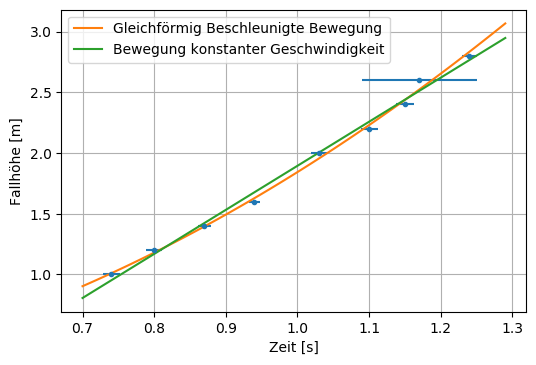

In [33]:
# Plotten der Messdaten:
plt.figure(dpi=100)
plt.errorbar(time, 
             height, 
             xerr=dtime, 
             yerr=dheight, 
             ls='', 
             marker='.')
times2 = [i/100 for i in range(70, 130)]
plt.plot(times2, 
         [fallhoehe(t, para[0]) for t in times2],
         label='Gleichförmig Beschleunigte Bewegung')
plt.plot(times2, 
         [fallhoehe2(t, para2[0], para2[1]) for t in times2],
         label='Bewegung konstanter Geschwindigkeit')
plt.legend()
plt.xlabel('Zeit [s]')
plt.ylabel('Fallhöhe [m]')
plt.grid()
plt.show()

### Zusatz:

Wie wir bereits am Versuchstag selbst festgestellt haben, können bei einem einfachen $\chi^2$ Fit lediglich die Fehler des Funktionswertes berücksichtigt werden. Da in unseren obigen Messdaten der Zeitfehler dominiert wollen wir nun noch einmal angucken, was denn passiert sofern wir die beiden Achsen tauschen. D.h. dieses mal wollen wir eine Funktion t(h, g) an unsere Messdaten anpassen:

$$t(h, g) = \sqrt{2 \cdot h/g}$$

Gucken wir uns zunächst wieder die Messdaten an:

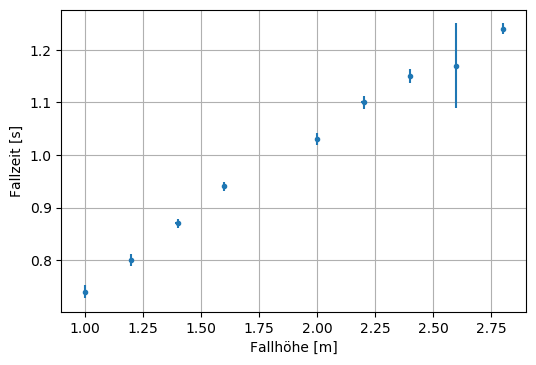

In [36]:
# Plotten der Messdaten:
plt.figure(dpi=100)
plt.errorbar(height, 
             time, 
             xerr=dheight, 
             yerr=dtime, 
             ls='', 
             marker='.')
plt.xlabel('Fallhöhe [m]')
plt.ylabel('Fallzeit [s]')
plt.grid()
plt.show()

def fallzeit(h, g):
    return (2 * h/g)**0.5

In [55]:
parat, pcovt = curve_fit(fallzeit, 
                       height,
                       time,
                       sigma=dtime,
                       absolute_sigma=True
                      )

chit = sum([(fallzeit(h, para[0]) - t)**2/dt**2 for t, h, dt in zip(time, height, dtime)])

print(f'''
Das die Fitgüte Chi²/ndof lautet {chit:.2f}/{len(height)-1}
und der Wert für g ist {parat[0]:.2f} +/- {pcovt[0,0]:.2f} m/s
''')


Das die Fitgüte Chi²/ndof lautet 4.17/8
und der Wert für g ist 3.67 +/- 0.00 m/s



Wie ihr sehen könnt sind die Werte für $g$ fast identisch mit den Werten des vorherigen Fits, jedoch sieht das $\chi^2$ dieses mal aufgrund der größeren Fehler besser aus. Dies spricht dafür, dass die Fehler von der Fallhöhe unterschätzt worden sind.

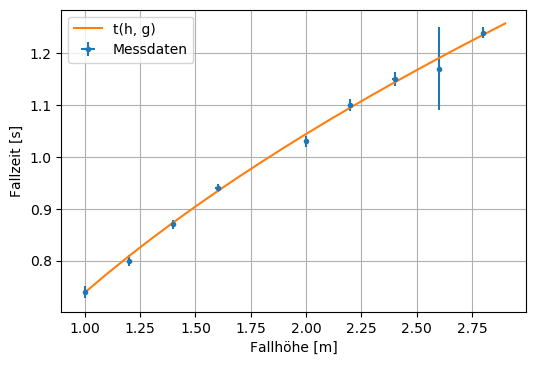

In [58]:
plt.figure(dpi=100)
plt.errorbar(height, 
             time, 
             xerr=dheight, 
             yerr=dtime, 
             ls='', 
             marker='.',
            label='Messdaten')
x = [i/10 for i in range(10, 30)]
plt.plot(x, 
         [fallzeit(i, parat[0]) for i in x],
        label='t(h, g)')
plt.legend()
plt.xlabel('Fallhöhe [m]')
plt.ylabel('Fallzeit [s]')
plt.grid()
plt.show()

# Bestimmen der Erdbeschleunigung mittels curve_fit und einer schiefen Ebene:

Der Zusammenhang der zurückgelegten Strecke $s$ einer Vollkugel auf einer schiefen Ebene ist gegeben durch:

$$ s(t) = \frac{5}{14} \cdot g \cdot \sin(\alpha) \cdot t^2$$

Während des Versuchs wurden jedoch die Startfallhöhe $h$ und die benötigte Zeit $t_\text{i}$ gemessen (wobei $i$ der Index für eure drei Messversuche ist.). Dies bedeutet, dass wir unsere obige Formel in Abhängigkeit dieser beiden Parameter ausdrücken müssen um $g$ mittels eines Fits bestimmen zu können. Das können wir erreichen sofern wir den folgenden Zusammenhang verwenden

$$ \sin(\alpha) = \frac{h}{l} $$

wobei $l$ die Länge unserer schiefen Ebene ist. Setzen wir dies in unsere obige Formel ein und lösen die Gleichung nach $h$ auf so erhalten wir

$$ h = \frac{14 \cdot l^2}{5} \cdot \frac{1}{g} \cdot \frac{1}{t_\text{i}^2}  $$

wobei wir hier noch verwendet haben das die maximal zurückgelegte Strecke der Kugel nach einer Zeit $t_\text{i}$ der Gesammtlänge der schiefen Ebene entspricht. Diese Formel für $h$ können wir nun auf unterschiedliche Arten und Weisen in Abhängigkeit der Zeit setzen wobei die bereits gezeigte Variante die erste ist:

**Variante 2. Parabel:**
$$h(x=\frac{1}{t_\text{i}}) =  \frac{14 \cdot l^2}{5} \cdot \frac{1}{g} \cdot x^2$$

**Variante 3. Ursprungsgerade:**
$$h(x=\frac{1}{t_\text{i}^2}) =  \frac{14 \cdot l^2}{5} \cdot \frac{1}{g} \cdot x$$


Da die erste Variante von uns am wenigsten Arbeit verlangt werden wir im folgenden diese Verwenden. Im folgenden werde ich den Schritt mit dem Einlesen der Messwerte überspringen, damit ihr meine verwendeten Werte sehen könnt.

Eure Messwerte sollten so oder so ähnlich aussehen. Es wurden für verschiedene Fallhöhen jeweils dreimal die Zeit gemessen:

In [1]:
# Eingelesene Messwerte:
h = [0.095, 0.112, 0.134, 0.148, 0.17, 0.188, 0.21, 0.235, 0.25, 0.276] # [m]
t1 = [2.65, 2.4, 2.17, 2.06, 1.91, 1.8, 1.68, 1.6, 1.52, 1.46]          # [s]
t2 = [2.71, 2.36, 2.19, 2.06, 1.9, 1.78, 1.69, 1.69, 1.53, 1.44]        # [s]
t3 = [2.66, 2.36, 2.19, 2.06, 1.9, 1.8, 1.68, 1.59, 1.52, 1.44]         # [s]
delta_t = [0.1]*len(h)   # [s]
delta_h = [0.005]*len(h) # [m]

l = 1.507 #[m]
delta_l = 0.005 #[m] 

Nun müssen wir uns unsere Formel definieren um unsere Messdaten fitten zu können. Hierbei ist es wichtig das eine Fitfunktion $\lambda$ von dieser Form ist $\lambda(x, \Theta)$ woebei $\Theta$ unsere Parameter sind. In unserem Fall entspricht dies einer Funktion $h(t, g)$ bzw. in den anderen beiden Varianten $h(x, g)$ wobei $x=1/t$ und $x=1/t^2$ in den Varianten 2 und 3 ist. 

In [2]:
def fallhoehe(t, g):
    l = 1.507
    return 14/5 *l**2 * 1/g * 1/t**2 

Als nächstes sollten wir zu jeder Fallhöhe den Mittelwert unserer drei Zeitmessungen bilden und den entsprechenden Fehler berechnen. Hierdurch erhalten wir ein genaueres Ergebnis für unsere gesuchte Zahl von $g$.

D.h. wir müssen uns zunächst eine Funktion definieren, welche den Mittelwert für unsere Messwerte berechnet

$$ \bar{x} = \frac{1}{n} \sum_i^n x_i $$

sowie dessen Standardabweichung 

$$\sigma_\text{n-1} = \sqrt{\frac{1}{n-1} \sum_\text{i}^\text{n} (\bar{x} - x_\text{i})^2}$$

In [3]:
# Mittelwert:
def mittelwert(l1, l2, l3):
    '''
    Funktion welche den Mittelwert für drei Messspalten 
    berechnet.
    '''
    result = []
    for i,j,k in zip(l1, l2, l3):
        result.append((i + j + k)/3)
    
    return result

# Standardabweichung
def standardabweichung(l1, l2, l3):
    '''
    Funktion welche die Standardabweichung für drei Messspalten 
    berechnet. 
    '''
    mean = mittelwert(l1, l2, l3)  # <-- hier rufen wir unsere Funktion des 
                                     # Mittelwertes in einer weitere Funktion
                                     # auf.
    result = []
    for m, i,j,k in zip(mean, l1, l2, l3):
        result.append( (1/2 *(m-i)**2 + (m-j)**2 + (m-k)**2 )**(1/2))
    
    return result
    
t_mean = mittelwert(t1, t2, t3)
t_std = standardabweichung(t1, t2, t3)

Nun können wir unsere Messwerte ersteinmal plotten:

In [4]:
import matplotlib.pyplot as plt

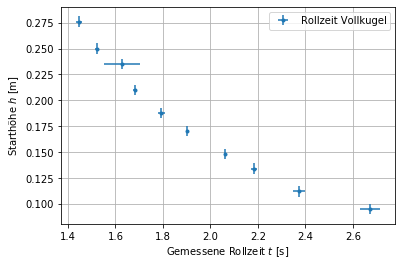

In [5]:
plt.errorbar(t_mean, 
             h, 
             xerr=t_std,
             yerr=delta_h,
            ls='',
            marker='.',
            label='Rollzeit Vollkugel')
plt.grid()
plt.xlabel('Gemessene Rollzeit $t$ [s]')
plt.ylabel('Starthöhe $h$ [m]')
plt.legend()
plt.show()

Man kann anhand des Plots bereits schön den nicht linearen Zusammenhang zwischen der Starthöhe $h$ und der Rollzeit $t$ erkennen. Als nächstes wollen wir nun aus diesen Daten unsere Erdbeschleunigung $g$ bestimmen. Hierzu verwenden wir wieder unsere Funktion `curve_fit`. Im folgenden möchte ich jedoch nochmal anhand dieses Datensatzes illustrieren, was curve_fit genau macht. Hierzu gucken wir uns die nachfolgenden Plots an (ignoriert zunächst einmal den Code).

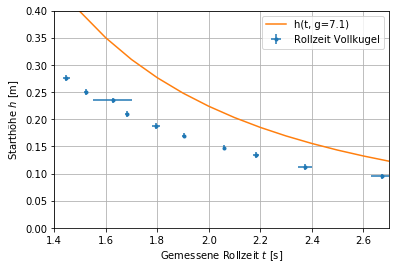

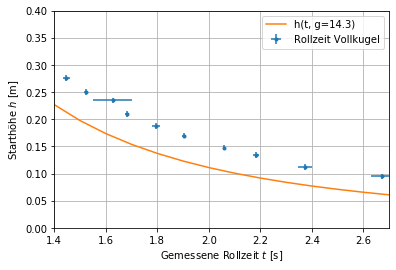

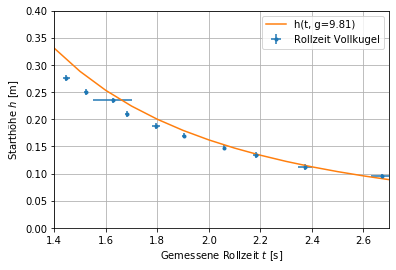

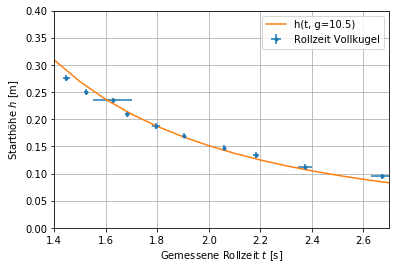

In [6]:
for g in [7.1, 14.3, 9.81, 10.5,]:
    plt.errorbar(t_mean, 
                 h, 
                 xerr=t_std,
                 yerr=delta_h,
                ls='',
                marker='.',
                label='Rollzeit Vollkugel')

    time = [i/10 for i in range(1,30)]

    plt.plot(time, 
             [fallhoehe(t, g) for t in time],
             label=f'h(t, g={g})')

    plt.xlim(1.4, 2.7)
    plt.ylim(0, 0.4)
    plt.grid()
    plt.xlabel('Gemessene Rollzeit $t$ [s]')
    plt.ylabel('Starthöhe $h$ [m]')
    plt.legend()
    plt.show()

Wie ihr sehen könnt, können wir durch einfaches ausprobieren feststellen welcher Wert von $g$ am besten zu unseren Messwerten passt. Und genau das macht curve_fit für euch. Curve_fit probiert solange (nach der Methode der kleinsten Quadrate), verschiedene Werte von $g$ aus bis es den am besten passenden Wert gefunden hat. Probieren wir dies nochmal aus:

In [7]:
from scipy.optimize import curve_fit

In [8]:
parameter, covariance_matrix = curve_fit(fallhoehe,
                                         t_mean,
                                         h,
                                         sigma=delta_h,
                                         absolute_sigma=True
                                        )

Hierbei schreibt curve_fit das Ergebnis der besten Werte in die Variable `parameter` und den deren Fehler in eine so genannte Kovarianzmatrix. Sprich das Ergebnis sieht für eine Funktion mit drei Parametern `def f(x, p1, p2, p3):` allgemein so aus:

```
paramter = [p1, p2, p3]
covariance = [[cov_1,1, cov_1,2, cov_1,3], 
             [cov_2,1, cov_2,2, cov_2,3],
             [cov_3,1, cov_3,2, cov_3,3]]
```
wobei `cov_i,i` der Varianz sprich dem $\sigma^2$ des Parameters i entspricht. Da wir in unserem Beispiel lediglich einen Parameter haben sieht das Ergebnis wie folgt aus:

In [9]:
print(f'g ist {parameter[0]:.2f} m/s^2')  # <-- einfache liste
print(f'Delta g ist {(covariance_matrix[0][0])**(1/2):.2f} m/s^2')  # <-- doppel liste

g ist 10.58 m/s^2
Delta g ist 0.09 m/s^2


Nun sollten wir noch das $\chi^2$ und die Anzahl an Freiheitsgraden berechnen um zu gucken wie gut unser Fit funktioniert hat:

In [10]:
def chiquadrat(xwerte, ywerte, dywerte, fun, g):
    chi = 0
    for x,y,dy in zip(xwerte, ywerte, dywerte):
        chi += (fun(x, g) - y)**2/dy**2
    return chi

In [11]:
chi = chiquadrat(t_mean, h, delta_h, fallhoehe, parameter[0])
ndof = len(h) - 1 # Anzahl Messwerte - Anzahl der Fitparamter

print(f' Das chi-quadrat und die Anzhal der Freiheitsgrade sind: {chi:.0f}/{ndof}')

 Das chi-quadrat und die Anzhal der Freiheitsgrade sind: 22/9


Wie ihr seht ist das $\chi^2/$ndof > 1, was bedeutet, dass unsere Fitfunktion die Daten nicht ganz wiederspiegelt. Um dies nachvollziehen zu können gucken wir uns erst einmal den finalen Plot an:

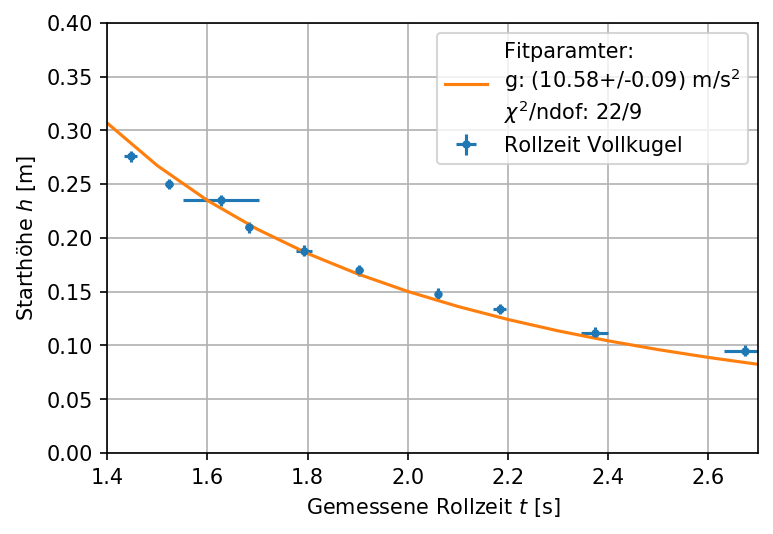

In [12]:
plt.figure(figsize=(5.6, 3.8), dpi=150) # <-- Größe eines A4-Blatts ausnutzen
# Plot der Messdaten
plt.errorbar(t_mean, 
             h, 
             xerr=t_std,
             yerr=delta_h,
            ls='',
            marker='.',
            label='Rollzeit Vollkugel')

# Fitergebnis:
time = [i/10 for i in range(1,30)]
plt.plot(time, 
         [fallhoehe(t, parameter[0]) for t in time],
         label=f'Fitparamter:\ng: ({parameter[0]:.2f}+/-{(covariance_matrix[0][0])**(1/2):.2f}) m/s$^2$\n'
        f'$\chi^2/$ndof: {chi:.0f}/{ndof}')

plt.xlim(1.4, 2.7)
plt.ylim(0, 0.4)
plt.grid()
plt.xlabel('Gemessene Rollzeit $t$ [s]', fontsize=10)
plt.ylabel('Starthöhe $h$ [m]', fontsize=10)
plt.legend(fontsize=10)
plt.show()

Wie ihr seht weicht unsere Funktion lediglich leicht von dem Großteil unserer Messdaten ab. Lediglich für kleine und große Fallhöhen ist die Abweichung stärker und unsere Funktion beschreibt die Messdaten nicht genau genug. Dies erklärt den leicht erhöhten Wert für unser $\chi^2$/ndof. Woran könnte dies liegen?   

# Bestimmen von mehren Parameter mittels curve_fit:

Und weil es so schön ist hier noch ein letztes Beispiel zum Thema fitten. Einige von euch haben sich gefragt warum ich überhaupt fitten muss wenn ich bei einfachen Funktionen wie zum Beispiel

$$ s(t) = 1/2 \cdot g \cdot t^2$$

die Funktion einfach nach $g$ auflösen und den Mittelwert und die Standardabweichung von $g$ berechnen kann. Bei Funktionen welche lediglich nur von einem Parameter abhängen geht das relative einfach aber wie sieht es im folgenden Beispiel aus:

$$ T(t, T_0, \tau, t_0) = \tau \cdot \cos\bigg(2 \cdot \pi \cdot \bigg(\frac{t-t0}{365 d}\bigg)\bigg) + T_0 $$

Die Funktion $T(t, T_0, \tau, t_0)$ soll die jährlichen Temperaturschwankungen an einem bestimmten Ort auf der Erde wiederspiegeln. Hierbei ist $T_0$ die Durchschnittstemperatur, $\tau$ der Temperatur unterschied und $t0$ eine Verschiebung des Cosinus entsprechend des Tages an dem die maximale Temperatur innerhalb eines Jahres gemessen wurde. Gucken wir uns zunächst die Messdaten an:   

In [79]:
import numpy as np # trigonometrische Funktionen findet ihr ebenfalls in numpy 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [92]:
# Gemessene Werte:
tage = [0.28, 10.36, 20.4, 30.23, 40.22, 50.11,
        60.25, 70.22, 80.25, 90.03, 100.24, 110.21,
        120.22, 130.25, 140.14, 150.09, 160.33, 170.31,
        180.27, 190.28, 200.25, 210.33, 220.18, 230.15,
        240.19, 250.37, 260.39, 270.35, 280.56, 290.23, 
        300.31, 310.17, 320.2, 330.11, 340.28, 350.48, 360.26] # d

gemessene_temperatur = [15.17, 15.31, 14.46, 16.2, 15.49,
                        16.18, 17.18, 16.17, 17.43, 18.24,
                        18.96, 19.69, 20.19, 21.33, 22.27, 
                        23.14, 23.6, 23.37, 23.39, 25.27, 
                        25.2, 24.63, 23.22, 23.95, 23.53, 
                        22.9, 22.59, 21.84, 20.77, 20.12, 
                        18.79, 18.29, 17.87, 16.86, 16.48, 
                        15.41, 14.2] # °C

fehler_temperatur = [0.52, 0.54, 0.54, 0.54, 0.51, 0.48, 
                     0.44, 0.39, 0.33, 0.28, 0.24, 0.22, 
                     0.24, 0.28, 0.33, 0.39, 0.44, 0.48, 
                     0.52, 0.54, 0.55, 0.55, 0.53, 0.5, 
                     0.46, 0.41, 0.35, 0.29, 0.25, 0.22, 
                     0.23, 0.26, 0.31, 0.37, 0.42, 0.47, 
                     0.5]

def temp(t, T0, tau, t0):
    """
    Jahrestemperaturverlauf für Ort x.
    
    Args:
        t: Zeit in Tagen
        T0: Mittlere Temperatur in °C
        tau: Temperaturschwankungsamplitude in °C
        t0: Zeitpunkt des heißesten Tages in Tagen
    """
    return tau * np.cos(2*np.pi*(t - t0)/365) + T0

Zunächst können wir uns ja mal die Messdaten angucken:

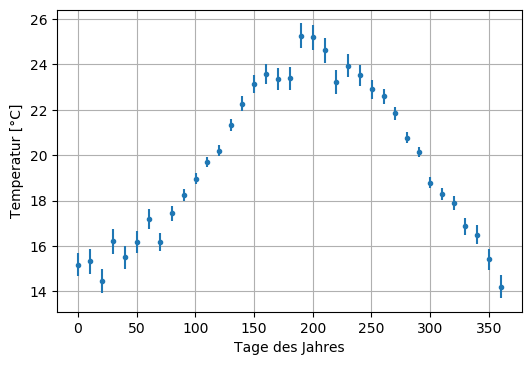

In [93]:
# Plot der Messdaten:
plt.figure(dpi=100)
plt.errorbar(tage, 
            gemessene_temperatur,
            fehler_temperatur, 
            ls='',
            marker='.')
plt.xlabel('Tage des Jahres')
plt.ylabel('Temperatur [°C]')
plt.grid()
plt.show()

Als nächstes führen wir, wie in den anderen Beispielen auch, den Fit mittelts curve_fit durch. 

In [111]:
# Fitten der Messdaten
para, pcov = curve_fit(temp,
                       tage,
                       gemessene_temperatur,
                       sigma=fehler_temperatur,
                       absolute_sigma=True
                       )

Im vergleich zu vorher haben wir diesesmal mehre Parameter sprich para ist jetzt eine Liste von Werten und die Kovarianzmatrix pcov eine verschachtelte Liste:

In [108]:
para

array([19.76428742, -4.757914  , 19.11533863])

In [109]:
pcov

array([[ 3.29660572e-03, -1.46005465e-04, -4.33280837e-04],
       [-1.46005465e-04,  1.13167030e-02, -9.24295630e-04],
       [-4.33280837e-04, -9.24295630e-04,  6.93117575e-01]])

Denkt daran, dass die Fehler euer Parameter der Wurzel der Hauptdiagonalen der Kovarianzmatrix entsprechen. Gucken wir uns doch nochmal die durch den Fit berechneten Werte etwas genauer an:

In [114]:
# Printausgabe der Parameter:
for ind, (pname, einheit) in enumerate(zip(('T0', 'tau', 't0'), ('°C', '°C', 'd'))):
    wert = para[ind]
    fehler = pcov[ind, ind]**0.5 # dies entspricht der Hauptdiagnolen mit den Indizes 1,1 2,2 etc.
    print(f'Der Wert für ist {pname} ({wert:.2f} +/- {fehler:.2f}) {einheit}')
    
# Zusatzinfo:
# In unserer for-Schleife haben wir einen weiteren nützlichen Befehl eingebaut:
# enumerate gibt euch einen Index enstsprechend dem aktuellen Schritt in euer Schleife 
# Probiert doch mal das folgende aus:
# for ind, buchstabe in enumerate(['A', 'B', 'C'], start=0):
#     print(ind, buchstabe)

Der Wert für ist T0 (19.76 +/- 0.06) °C
Der Wert für ist tau (-4.76 +/- 0.11) °C
Der Wert für ist t0 (19.12 +/- 0.83) d


Nun sollten wir auch das $\chi^2$ berechnen um ein Gefühl für die Fitgüte zu bekommen:

In [118]:
# Berechnen des Chi**2:
chi_liste = []
for t, T, dT in zip(tage, gemessene_temperatur, fehler_temperatur):
    chi_liste.append((temp(t, para[0], para[1], para[2]) - T)**2/dT**2)
chi = sum(chi_liste)    
print(f'Das Chi-Quadrat beträgt {chi:.2f} mit {len(gemessene_temperatur) - 3} Freiheitsgraden.')


# Zusatzinfo: 
# Ihr könnt das ganze auch wieder etwas kompakter als list comprehension schreiben.
# Außerdem könnt ihr die Fitparameter anstatt als para[0], para[1], para[2] mit Hilfe von
# *para an die Funktion geben. Der Stern ordnet die Werte in euerer Liste der Reihe nach den 
# Argumenten euer Funktion zu:
# chi = sum([(temp(t, *para) - T)**2/dT**2  for t, T, dT in zip(tage, gemessene_temperatur, fehler_temperatur)])

Das Chi-Quadrat beträgt 41.96 mit 34 Freiheitsgraden.


Wie ihr seht scheinen die Fitparameter den Funktionsverlauf ganz gut zu beschreiben, gucken wir uns also mal das Resultat zusammen mit den Messwerten an.

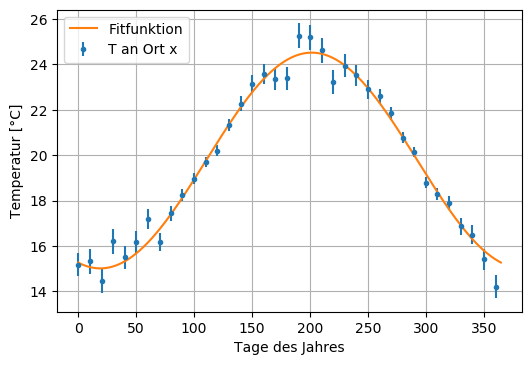

In [103]:
plt.figure(dpi=100)
plt.errorbar(tage, 
            gemessene_temperatur,
            fehler_temperatur, 
            ls='',
            marker='.',
            label='T an Ort x')
tage2 = [t/10 for t in range(3650)]
plt.plot(tage2, temp(tage2, *para), label='Fitfunktion')
plt.legend(loc=2)
plt.xlabel('Tage des Jahres')
plt.ylabel('Temperatur [°C]')
plt.grid()
plt.show()


Hier noch ein kleiner Zusatz: Ist euch etwas aufgefallen? Der Fitparameter $T_0$ hat einen Wert von ca. 20 Tagen obwohl das Maximum eher bei 200 Tagen liegt. Dennoch beschreibt der Fit den Verlauf der Messdaten sehr gut. Dies liegt daran, das der Cosinus eine periodische Funktion ist. Bei der Methode der kleinsten Quadrate werden die Fitparameter so lange, nach einem gewissen Schema variiert, bis das Chi-Qudarat minimal ist. Bei einer periodischen Funktion gibt es mehre dieser Minima. 

Dies kann auch bei anderen komplexeren Funktionen der Fall sein. Da die meisten Funktionen jedoch nicht periodisch sind handelt es sich in der Regel bei diesen zusätzlichen Minima nur um lokale Minima. Um die besten Fitparameter zu finden wollen wir jedoch das globale Minimum finden. Um dies zu erreichen können wir curve_fit ein wenig helfen und zum Beispiel noch zusätzlich Startwerte für unsere Fitparameter mitgeben: 

In [123]:
# Die Startwerte sind entsprechend der Reihenfolge der Parameter der Fitfunktion anzugeben.
# In unserem Fall ist dies T0, tau, t0. Sollten wir keine Idee für einen Startwert haben 
# können wir einfach den entsprechenden Wert auf einen passenden Wert setzen hier z.B, 1.
startwerte = [1, 1, 200]

# Fitten der Messdaten
para, pcov = curve_fit(temp,
                       tage,
                       gemessene_temperatur,
                       sigma=fehler_temperatur,
                       absolute_sigma=True,
                       p0=startwerte  # <-- Übergeben der Startwerte an die Funktion:
                       )

In [126]:
# Erneutes printen der Fitwerte und des Chi**2
for ind, (pname, einheit) in enumerate(zip(('T0', 'tau', 't0'), ('°C', '°C', 'd'))):
    wert = para[ind]
    fehler = pcov[ind, ind]**0.5 # dies entspricht der Hauptdiagnolen mit den Indizes 1,1 2,2 etc.
    print(f'Der Wert für ist {pname} ({wert:.2f} +/- {fehler:.2f}) {einheit}')
    
chi = sum([(temp(t, *para) - T)**2/dT**2  for t, T, dT in zip(tage, gemessene_temperatur, fehler_temperatur)])
chi = sum(chi_liste)    
print(f'Das Chi-Quadrat beträgt {chi:.2f} mit {len(gemessene_temperatur) - 3} Freiheitsgraden.')

Der Wert für ist T0 (19.76 +/- 0.06) °C
Der Wert für ist tau (4.76 +/- 0.11) °C
Der Wert für ist t0 (201.62 +/- 0.83) d
Das Chi-Quadrat beträgt 41.96 mit 34 Freiheitsgraden.


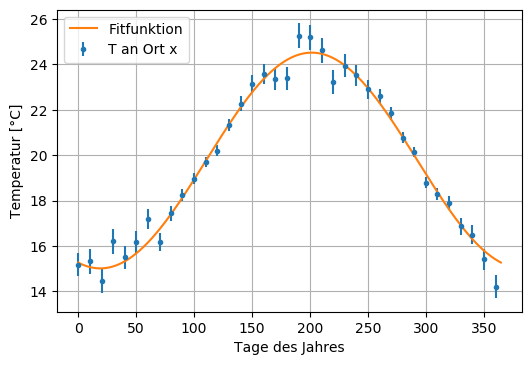

In [122]:
# Erneutes plotten der Funktion:
plt.figure(dpi=100)
plt.errorbar(tage, 
            gemessene_temperatur,
            fehler_temperatur, 
            ls='',
            marker='.',
            label='T an Ort x')
tage2 = [t/10 for t in range(3650)]
plt.plot(tage2, temp(tage2, *para), label='Fitfunktion')
plt.legend(loc=2)
plt.xlabel('Tage des Jahres')
plt.ylabel('Temperatur [°C]')
plt.grid()
plt.show()

Wie ihr sehen könnt konnten wir mit Hilfe der Startwerte den Fit so beeinflussen, dass curve_fit dieses mal das "richtige" Minimum finden konnte. Daher empfehle ich euch bei komplexeren Problem sich immer erst die Messdaten an zugucken und ein paar Startwerte für den Fit zu raten/schätzen. 

## Zusatz: Arbeiten mit Numpy-Arrays: 

In den obigen Beispielen haben wir oftmals viele Zeilen Code definieren müssen bevor wir etwas berechnen konnten. Viele der von uns definierten Funktionen existieren bereits und sind in anderen Packages enthalten. Ein sehr nützliches Package, ist dass das **Numpy**-Package. Hierbei sind insbesondere die **Numpy-arrays** eine tolle Sache, welche viele Prozesse vereinfacht. Im nachfolgenden möchte ich euch anhand der Beispielaufgabe noch zeigen, wie Numpy-arrays funktionieren. Sofern ihr mehr lernen möchtet gibt es viele Turotials zu Numpy im Internet bzw. auf Youtube.

In [13]:
import numpy as np

In [14]:
h = np.array([0.095, 0.112, 0.134, 0.148, 0.17, 0.188, 0.21, 0.235, 0.25, 0.276]) # [m]
t = np.array([[2.65, 2.4, 2.17, 2.06, 1.91, 1.8, 1.68, 1.6, 1.52, 1.46],     # Messwerte 1 [s]
              [2710, 2360, 2190, 2060, 1900, 1780, 1690, 1690, 1530, 1440],   # Messwerte 2 [ms]
              [2.66, 2.36, 2.19, 2.06, 1.9, 1.8, 1.68, 1.59, 1.52, 1.44]])   # Messwerte 3 [s]
delta_t = np.array([0.1]*len(h))   # [s]
delta_h = np.array([5]*len(h))     # [mm]

Das Arbeiten mit Numpy-arrays funktioniert ähnlich wie mit Listen, d.h. das Slicing ist das Gleich:

In [15]:
l = [1,2,3,4,5,6]
a = np.array([1,2,3,4,5,6])

print(l[1], a[1])
print(l[2:5], a[2:5])

2 2
[3, 4, 5] [3 4 5]


Oder unsere Zeitdaten, welche wir als eine Matrix gespeichert haben:

In [16]:
t

array([[2.65e+00, 2.40e+00, 2.17e+00, 2.06e+00, 1.91e+00, 1.80e+00,
        1.68e+00, 1.60e+00, 1.52e+00, 1.46e+00],
       [2.71e+03, 2.36e+03, 2.19e+03, 2.06e+03, 1.90e+03, 1.78e+03,
        1.69e+03, 1.69e+03, 1.53e+03, 1.44e+03],
       [2.66e+00, 2.36e+00, 2.19e+00, 2.06e+00, 1.90e+00, 1.80e+00,
        1.68e+00, 1.59e+00, 1.52e+00, 1.44e+00]])

In [17]:
t[0][2:4] # <-- Erste spalte, die Werte 2 bis 4

array([2.17, 2.06])

Jedoch ist die große Stärke von Numpy-arrays, dass diese sich ähnlich wie Vektoren bzw. Matrizen verhalten. Zum Beispiel beim multiplizieren von einem "Vektor" mit einem Skala:

In [18]:
delta_h = delta_h * 10**(-3) # wir hatten delta_h in mm definiert und hier wandeln wir es in m um.
delta_h

array([0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
       0.005])

Das gleiche gilt für Matrizen:

In [19]:
t # <-- Spalte 2 hatte ich in ms definiert ...

array([[2.65e+00, 2.40e+00, 2.17e+00, 2.06e+00, 1.91e+00, 1.80e+00,
        1.68e+00, 1.60e+00, 1.52e+00, 1.46e+00],
       [2.71e+03, 2.36e+03, 2.19e+03, 2.06e+03, 1.90e+03, 1.78e+03,
        1.69e+03, 1.69e+03, 1.53e+03, 1.44e+03],
       [2.66e+00, 2.36e+00, 2.19e+00, 2.06e+00, 1.90e+00, 1.80e+00,
        1.68e+00, 1.59e+00, 1.52e+00, 1.44e+00]])

In [20]:
t[1] = t[1] * 10**(-3) #... wir wollen aber s
t

array([[2.65, 2.4 , 2.17, 2.06, 1.91, 1.8 , 1.68, 1.6 , 1.52, 1.46],
       [2.71, 2.36, 2.19, 2.06, 1.9 , 1.78, 1.69, 1.69, 1.53, 1.44],
       [2.66, 2.36, 2.19, 2.06, 1.9 , 1.8 , 1.68, 1.59, 1.52, 1.44]])

Natürlich können wir auch zwei "Vektoren"/arrays mit gleicher länge miteinander Multiplizieren oder addieren:

In [21]:
np.array([1,2,3]) * np.array([3,3,3])   # Etwas anders als in der Mathematik, 
                                        # hier bekommt ihr kein Skala sondern 
                                        # nur die Produkte der Einträge

array([3, 6, 9])

In [22]:
np.array([1,2,3]) + np.array([3,3,3]) 

array([4, 5, 6])

Diese nützlichen Features der arrays lassen uns Funktionen viel einfacher definieren und anwenden. Anstatt 

In [23]:
result = []
for time in t_mean:
    result.append(fallhoehe(time, 9.81))
result

[0.0907004206977808,
 0.11507952238214755,
 0.13598012562087386,
 0.15274995390312052,
 0.17893109576554916,
 0.20155495845308732,
 0.22875746846189743,
 0.24497309776645806,
 0.2793351818514591,
 0.30972665269221794]

Können wir ganz einfach schreiben:

In [24]:
t_mean = np.array(t_mean) # <-- erst müssen wir natürlich unsere liste
                          # in ein array umwandeln

fallhoehe(t_mean, 9.81)
# Was equivalent ist zu einem Produkt zwischen einem "Skala" und einem "Vetor"

array([0.09070042, 0.11507952, 0.13598013, 0.15274995, 0.1789311 ,
       0.20155496, 0.22875747, 0.2449731 , 0.27933518, 0.30972665])

Es gibt auch andere tolle Funktionen die mit dem numpy-Package kommen. Zum Beispiel eine Funktion für den Mittelwert und die Standardabweichung: 

In [25]:
a = np.array([1,2,3,4])
print(np.mean(a), np.std(a))

2.5 1.118033988749895


Erinnert ihr euch, dass wir dieses mal die Zeitwerte als eine Art n x m Matrix gespeichert haben (wobei n=3 und m=10)? `np.mean` und `np.std` erlauben euch das errechnen von den Werten entlang einer Bestimmten "Achse" eures arrays:

In [26]:
np.mean(t) # <-- gibt den Mittelwert über alle Werte

1.9266666666666665

In [27]:
t_mean_array = np.mean(t, axis=0) # <-- Mittelwert entlang der ersten n-achse 
print(t_mean, t_mean_array)

[2.67333333 2.37333333 2.18333333 2.06       1.90333333 1.79333333
 1.68333333 1.62666667 1.52333333 1.44666667] [2.67333333 2.37333333 2.18333333 2.06       1.90333333 1.79333333
 1.68333333 1.62666667 1.52333333 1.44666667]


In [28]:
np.mean(t, axis=1) # <-- Mittelwert entlang der m-achse

array([1.925, 1.935, 1.92 ])

Das gleiche können wir für unsere Standardabweichung machen:

In [29]:
t_std_array = np.std(t, axis=0)

Der Part über das fitten bleibt unverändert, jedoch können wir im Anschluss auch unser $\chi^2$ wieder einfacher berechnen: 

In [30]:
chi_array = np.sum( (fallhoehe(t_mean_array, parameter[0]) - h)**2/delta_h**2)
print(chi_array, chi)

21.616487152931544 21.616487152931523


Beim plotten selbst können wir noch die Funktion `np.arange` nutzen um uns das Leben etwas zu erleichtern. Im obigen Beispiel hatte ich unsere Fitfunktion mittels der `range`-Funktion geplottet.

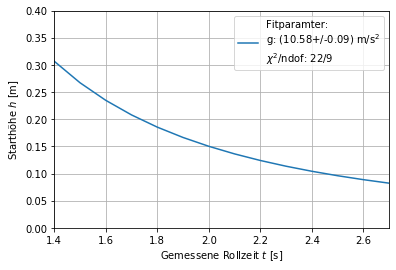

In [31]:
time = [i/10 for i in range(1,30)] #<-- Erstellen von Zeitwerten zwischen 0.1 und 3 in 0.1 Schritten 
                                   # um eine glatte Kurve zu plotten.
plt.plot(time, 
         [fallhoehe(t, parameter[0]) for t in time],
         label=f'Fitparamter:\ng: ({parameter[0]:.2f}+/-{(covariance_matrix[0][0])**(1/2):.2f}) m/s$^2$\n'
        f'$\chi^2/$ndof: {chi:.0f}/{ndof}')

plt.xlim(1.4, 2.7)
plt.ylim(0, 0.4)
plt.grid()
plt.xlabel('Gemessene Rollzeit $t$ [s]', fontsize=10)
plt.ylabel('Starthöhe $h$ [m]', fontsize=10)
plt.legend(fontsize=10)
plt.show()

Mit `np.arange` geht dies einfacher: 

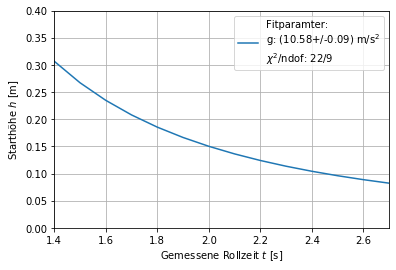

In [32]:
time_array = np.arange(0.1,3,0.1)
plt.plot(time, 
         [fallhoehe(t, parameter[0]) for t in time],
         label=f'Fitparamter:\ng: ({parameter[0]:.2f}+/-{(covariance_matrix[0][0])**(1/2):.2f}) m/s$^2$\n'
        f'$\chi^2/$ndof: {chi:.0f}/{ndof}')

plt.xlim(1.4, 2.7)
plt.ylim(0, 0.4)
plt.grid()
plt.xlabel('Gemessene Rollzeit $t$ [s]', fontsize=10)
plt.ylabel('Starthöhe $h$ [m]', fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [33]:
print(time, time_array)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9] [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]


Ich hoffe der Zusatz hilft euch. Viel Spaß im PGP!